In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. EDA & Data Wrangling
df = pd.read_csv('/content/vgames2.csv')
df.head()
df.shape

df.info()
df['Platform'].unique();
df['Year'].unique();
df['Genre'].unique();
df['Publisher'].unique();

In [ ]:
# 분석에 필요없는 열 삭제
df_check = df.drop(['Unnamed: 0', 'Publisher'], axis=1)
df.drop(['Unnamed: 0', 'Publisher'], axis=1, inplace=True)

# 중복치 확인 후 제거
df.duplicated().sum()
df[df.duplicated()]
df[df['Name'] == 'Wii de Asobu: Metroid Prime']
df.drop_duplicates(inplace=True)

df.reset_index(drop=True, inplace=True)
df.info()

In [ ]:
# 결측치 확인
df.isnull()
Year_null = df[df['Year'].isnull() == True]
Genre_null = df[df['Genre'].isnull() == True]


# 결측치를 제거해도 되는지 개별 관측치의 출고량 비중을 확인
# 출고량 데이터 정제
def change(data):
    for i in range(len(data)):
        if 'K' in data[i]: # K를 삭제하고 flaot타입으로 변경 후 1000을 곱해줌
            data[i] = data[i].replace('K', '')
            data[i] = float(data[i])*1e3
        elif 'M' in data[i]: # M을 삭제하고 flaot타입으로 변경 후 1000000을 곱해줌
            data[i] = data[i].replace('M', '')
            data[i] = float(data[i])*1e6
        else: # 기본단위는 M이므로 1000000을 곱해줌
            data[i] = float(data[i])*1e6
    return data

change(df['NA_Sales'])
change(df['EU_Sales'])
change(df['JP_Sales'])
change(df['Other_Sales'])

df['NA_Sales'] = df['NA_Sales'].astype('float')
df['EU_Sales'] = df['EU_Sales'].astype('float')
df['JP_Sales'] = df['JP_Sales'].astype('float')
df['Other_Sales'] = df['Other_Sales'].astype('float')

df.dtypes

In [ ]:
# 출고량 이상치 확인
round(df.describe())

plt.boxplot(df['NA_Sales'])
df[df['NA_Sales'] == df['NA_Sales'].max()]

plt.boxplot(df['EU_Sales'])
df[df['EU_Sales'] == df['EU_Sales'].max()]

plt.boxplot(df['JP_Sales'])
df[df['JP_Sales'] == df['JP_Sales'].max()]

plt.boxplot(df['NA_Sales'])
df[df['Other_Sales'] == df['Other_Sales'].max()]

In [ ]:
# 정상적인 출고량 확인 후 개별 관측치의 출고량 비중 확인
# Genre_null 개별 관측치의 출고량 비중을 확인
G_I = Genre_null.index
df.iloc[G_I]
print(round(df.iloc[G_I]['NA_Sales'].sum() / df['NA_Sales'].sum() * 100, 2), '%')
print(round(df.iloc[G_I]['EU_Sales'].sum() / df['EU_Sales'].sum() * 100, 2), '%')
print(round(df.iloc[G_I]['JP_Sales'].sum() / df['JP_Sales'].sum() * 100, 2), '%')
print(round(df.iloc[G_I]['Other_Sales'].sum() / df['Other_Sales'].sum() * 100, 2), '%')

# Year_null 개별 관측치의 출고량 비중을 확인
Y_I = Year_null.index
df.iloc[Y_I]
print(round(df.iloc[Y_I]['NA_Sales'].sum() / df['NA_Sales'].sum() * 100, 2), '%')
print(round(df.iloc[Y_I]['EU_Sales'].sum() / df['EU_Sales'].sum() * 100, 2), '%')
print(round(df.iloc[Y_I]['JP_Sales'].sum() / df['JP_Sales'].sum() * 100, 2), '%')
print(round(df.iloc[Y_I]['Other_Sales'].sum() / df['Other_Sales'].sum() * 100, 2), '%')

# 모든 null값의 전체 대비 비중이 1.5%이하이므로 제거해도 분석에 큰 영향이 없다고 판단
df.dropna(inplace=True)

0.47 %
0.54 %
1.0 %
0.69 %
1.35 %
1.03 %
0.52 %
1.1 %


0.63 %
0.66 %
1.04 %
0.64 %


<ipython-input-14-b4998f604a33>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype('int')


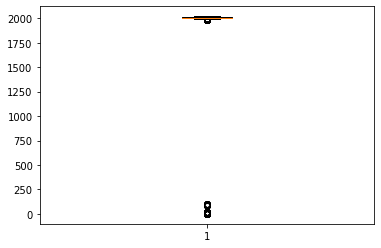

In [ ]:
# Year의 이상치 확인 후 제거
round(df['Year'].describe())
plt.boxplot(df['Year'])
df_Year = df[df['Year'] < 1950]

print(round(df_Year['NA_Sales'].sum() / df['NA_Sales'].sum() * 100, 2), '%')
print(round(df_Year['EU_Sales'].sum() / df['EU_Sales'].sum() * 100, 2), '%')
print(round(df_Year['JP_Sales'].sum() / df['JP_Sales'].sum() * 100, 2), '%')
print(round(df_Year['Other_Sales'].sum() / df['Other_Sales'].sum() * 100, 2), '%')

# Year 이상치의 전체 대비 비중이 1.5%이하이므로 제거해도 분석에 큰 영향이 없다고 판단
df = df[df['Year'] >= 1950]
df['Year'] = df['Year'].astype('int')

In [ ]:
# Platform 및 Genre의 종류 확인
df['Platform'].unique()
df['Genre'].unique()
df.info()

# 여기까지 데이터 정제 완료

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16177 entries, 0 to 16596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16177 non-null  object 
 1   Platform     16177 non-null  object 
 2   Year         16177 non-null  int64  
 3   Genre        16177 non-null  object 
 4   NA_Sales     16177 non-null  float64
 5   EU_Sales     16177 non-null  float64
 6   JP_Sales     16177 non-null  float64
 7   Other_Sales  16177 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
# 1차 EDA
# 지역별 게임 장르별 출고량 파악
df_Genre = df.groupby(['Genre'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()

# NA
ratio_NA = df_Genre['NA_Sales'] / df_Genre['NA_Sales'].sum()
labels = df_Genre.index
explode = np.repeat(0.05, 12)
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

plt.pie(ratio_NA, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, \
        wedgeprops=wedgeprops)
plt.show()

# EU
ratio_EU = df_Genre['EU_Sales'] / df_Genre['EU_Sales'].sum()

plt.pie(ratio_EU, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, \
        wedgeprops=wedgeprops)
plt.show()

# JP
ratio_JP = df_Genre['JP_Sales'] / df_Genre['JP_Sales'].sum()

plt.pie(ratio_JP, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, \
        wedgeprops=wedgeprops)
plt.show()

# Other
ratio_Other = df_Genre['Other_Sales'] / df_Genre['Other_Sales'].sum()

plt.pie(ratio_Other, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, \
        wedgeprops=wedgeprops)
plt.show()

In [ ]:
# 분포를 한 눈에 파악하기 쉽도록 label갯수를 과반수를 차지하는 상위 7개로 조정
# ratio_NA = pd.DataFrame(ratio_NA)
# ratio_NA['Rank'] = ratio_NA.rank(method='average', ascending=False) # 순위 확인
# Rank_NA = ratio_NA[ratio_NA['Rank'] <= 8]
# Rank_NA.loc['Etc'] = 1 - Rank_NA['NA_Sales'].sum() # Etc에 나머지 비율 저장
# 위의 과정 함수화
def Rank(ratio):
    ratio = pd.DataFrame(ratio)
    ratio.drop('Misc', axis=0, inplace=True) # 기타 장르 제외
    ratio['Rank'] = ratio.rank(method='average', ascending=False)
    Rank = ratio[ratio['Rank'] <= 7]
    Rank[Rank.columns[0]] = Rank[Rank.columns[0]] * 100
    return Rank

Rank_NA = Rank(ratio_NA)
Rank_EU = Rank(ratio_EU)
Rank_JP = Rank(ratio_JP)
Rank_Other = Rank(ratio_Other)

# 출고량 순서대로 sort
def Rank_sort(Rank):
    Rank = Rank.sort_values(by='Rank', axis=0)
    return Rank

Rank_NA = Rank_sort(Rank_NA)
Rank_EU = Rank_sort(Rank_EU)
Rank_JP = Rank_sort(Rank_JP)
Rank_Other = Rank_sort(Rank_Other)

<ipython-input-17-f4904f72d093>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rank[Rank.columns[0]] = Rank[Rank.columns[0]] * 100


In [ ]:
# barplot으로 비교
# sns.set_theme() # 얘가 한글폰트 깨짐 이유
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

def Rank_plot(x, r):
    sns.barplot(x.index, x[x.columns[0]])
    plt.title("{} 게임 장르별 출고량 (%)".format(r))
    plt.show()

Rank_plot(Rank_NA, '북미')
Rank_plot(Rank_EU, '유럽')
Rank_plot(Rank_JP, '일본')
Rank_plot(Rank_Other, '기타 지역')

In [ ]:
# 연도별 장르 출고량
df_gy = df.groupby(['Genre', 'Year'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
df_gy['All_Sales'] = None

for i in range(len(df_gy)):
    df_gy.iloc[i, 4] = df_gy.iloc[i].sum()
    
# plot
def plot_year(r):
    sns.lineplot(data=df_gy, x="Year", y=r, hue="Genre", legend = False)
    plt.legend(labels=df_Genre.index, loc = 'upper left', bbox_to_anchor = (1, 1))
    plt.show()

plot_year('All_Sales')
plot_year('NA_Sales')
plot_year('EU_Sales')
plot_year('JP_Sales')
plot_year('Other_Sales')

In [ ]:
# plot 결과 2000년대 이전의 판매량은 트렌드 예측을 위한 분석에서 중요도가 낮고 데이터도 적음
# 또한 콘솔 플랫폼 대부분을 차지하는 PS,XBOX,Nintendo가 본격적으로 자리잡은 시기가 2000년 이후이므로
# 앞으로의 분석은 2000년 이후 데이터만 사용하는 것이 적절하다고 판단
# 2000년 이후로 상대적으로 비율이 낮은 플랫폼 제외(DC, WS, GB, N64)
df = df.query('Year >= 2000')
df = df.sort_values(by='Year', axis=0)

def drop_platform(x):
    index_platform = df[df['Platform'] == '{}'.format(x)].index
    df.drop(index_platform, axis=0, inplace=True)

drop_platform('DC')
drop_platform('WS')
drop_platform('GB')
drop_platform('N64')

df.reset_index(drop=True, inplace=True)

df['All_Sales'] = None

for i in range(len(df)):
    df.iloc[i, -1] = df.iloc[i, -5:-1].sum()

In [ ]:
# 2차 EDA
# 지역별 게임 장르별 출고량 파악
df_Genre = df.groupby(['Genre'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
df_Genre['All_Sales'] = None

for i in range(len(df_Genre)):
    df_Genre.iloc[i, -1] = df_Genre.iloc[i].sum()

# 판매비중
ratio_NA = df_Genre['NA_Sales'] / df_Genre['NA_Sales'].sum()
ratio_EU = df_Genre['EU_Sales'] / df_Genre['EU_Sales'].sum()
ratio_JP = df_Genre['JP_Sales'] / df_Genre['JP_Sales'].sum()
ratio_Other = df_Genre['Other_Sales'] / df_Genre['Other_Sales'].sum()
ratio_All = df_Genre['All_Sales'] / df_Genre['All_Sales'].sum()

Rank_NA = Rank(ratio_NA)
Rank_EU = Rank(ratio_EU)
Rank_JP = Rank(ratio_JP)
Rank_Other = Rank(ratio_Other)
Rank_All = Rank(ratio_All)

Rank_NA = Rank_sort(Rank_NA)
Rank_EU = Rank_sort(Rank_EU)
Rank_JP = Rank_sort(Rank_JP)
Rank_Other = Rank_sort(Rank_Other)
Rank_All = Rank_sort(Rank_All)

# barplot으로 비교
Rank_plot(Rank_NA, '북미')
Rank_plot(Rank_EU, '유럽')
Rank_plot(Rank_JP, '일본')
Rank_plot(Rank_Other, '기타 지역')
Rank_plot(Rank_All, '전세계')

In [ ]:
# 플랫폼 별 출고량
df_Platform = df.groupby('Platform')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()

df_Platform['All_Sales'] = None

for i in range(len(df_Platform)):
    df_Platform.iloc[i, -1] = df_Platform.iloc[i, -5:-1].sum()

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

def Platform_plot(r, r_name):
    y_val = df_Platform['{}'.format(r)] / 1e6
    sns.barplot(data=df_Platform, x=df_Platform.index, y=y_val)
    plt.title("{} 플랫폼별 출고량 (백 만장)".format(r_name))
    plt.show()
    
Platform_plot('NA_Sales', '북미')
Platform_plot('EU_Sales', '유럽')
Platform_plot('JP_Sales', '일본')
Platform_plot('Other_Sales', '기타 지역')
Platform_plot('All_Sales', '전세계')

In [ ]:
# 플랫폼 기종별로 데이터 취합(X360, XB, XOne / PS, PS2, PS3, PS4, PSP, PSV / Wii, WiiU, 3DS, DS, GBA, GC)
# 같은 회사의 기기는 같은 서드파티에서 게임을 개발하므로 시리즈의 연속성이 있어 고객의 충성도가 높음(예 : 포켓몬스터)
df_check = df.copy()
df = df.replace({'Platform' : ['X360', 'XB', 'XOne']}, 'XBOX')
df = df.replace({'Platform' : ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']}, 'PlayStation')
df = df.replace({'Platform' : ['Wii', 'WiiU', '3DS', 'DS', 'GBA', 'GC']}, 'Nintendo')

df_Platform = df.groupby('Platform')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()

df_Platform['All_Sales'] = None

for i in range(len(df_Platform)):
    df_Platform.iloc[i, -1] = df_Platform.iloc[i, -5:-1].sum()
    
def Platform_plot(r, r_name):
    y_val = df_Platform['{}'.format(r)] / 1e6
    sns.barplot(data=df_Platform, x=df_Platform.index, y=y_val)
    plt.title("{} 플랫폼별 출고량 (백 만장)".format(r_name))
    plt.show()
    
Platform_plot('NA_Sales', '북미')
Platform_plot('EU_Sales', '유럽')
Platform_plot('JP_Sales', '일본')
Platform_plot('Other_Sales', '기타 지역')
Platform_plot('All_Sales', '전세계')

In [ ]:
# 00-20 연도별 장르 출고량
df_top7 = df.query("Genre == ('Sports', 'Simulation', 'Platform', 'Action', 'Role-Playing', 'Shooter', 'Racing')")
df_top7.reset_index(drop=True, inplace=True)
df_Genre = pd.DataFrame(['Action', 'Platform', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports'],
                        columns=['Genre'])

df_gy = df_top7.groupby(['Genre', 'Year'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
df_gy['All_Sales'] = None

for i in range(len(df_gy)):
    df_gy.iloc[i, 4] = df_gy.iloc[i].sum()
    
# plot
def plot_year(r, r_name):
    sns.lineplot(data=df_gy, x="Year", y=r, hue="Genre", legend = False)
    plt.title("{} 연도별 게임 출고량(백 만장)".format(r_name))
    plt.legend(labels=df_Genre['Genre'], loc = 'upper left', bbox_to_anchor = (1, 1))
    plt.show()

plot_year('All_Sales', '전세계')
plot_year('NA_Sales', '북미')
plot_year('EU_Sales', '유럽')
plot_year('JP_Sales', '일본')
plot_year('Other_Sales', '기타 지역')

In [ ]:
# 인기가 많은 게임
df_Rank = df.sort_values(by='All_Sales', ascending=False, axis=0)
df_Rank['Rank'] = df_Rank['All_Sales'].rank(method='average', ascending=False)
df_Rank.reset_index(drop=True, inplace=True)

# 순위별 판매량
sns.scatterplot(data=df_Rank, x='Rank', y='All_Sales')
plt.vlines(800, 0, 6e7, color='red', linestyle='solid', linewidth=1)
plt.show()

# 로그스케일
sns.scatterplot(data=df_Rank, x='Rank', y='All_Sales')
plt.vlines(800, 1e5, 6e7, color='red', linestyle='solid', linewidth=1)
plt.semilogy(base=10)
plt.show()

In [ ]:
# 상위 100 중위 100 하위 100에서 인기IP 타이틀 추출(수작업)
df_800 = df_Rank.query('Rank <= 800')

# IP_Name(인기IP) 설정
IP_Name = pd.read_csv('/content/IP.csv')
IP_Name['IP_Name'] = IP_Name.columns
IP_Name.drop(IP_Name['IP_Name'], axis=1, inplace=True)
IP_Nintendo = pd.DataFrame(['Wii', 'Pokémon', 'Pokemon', 'Mario', 'Zelda,Super', 'Smash Bros'])
IP_Nintendo.rename(columns = {0 : 'IP_Name'}, inplace = True)

import re
p = re.compile('\d')
df_800['IP'] = None
df_800.iloc[:, -1] = 0

# IP_Name에 포함되거나 이름에 숫자가 있으면 인기IP (1) 아니면 신규IP (0) 
for i in range(len(df_800)):
    if (p.search(df_800['Name'][i]) != None) == True: # 타이틀 이름에 숫자가 있으면
        df_800.iloc[i, -1] = 1
    else:
        for j in range(len(IP_Name)):
            if IP_Name.iloc[j, 0] in df_800['Name'][i]: # IP_Name에 포함되면
                df_800.iloc[i, -1] = 1

In [ ]:
# 귀무가설과 대립가설
# 인기 IP의 평균 판매량이 신규 IP의 평균판매량보다 크다.
# H0 u인기 <= u신규
# H1 u인기 > u신규

# 로열티가 없다고 가정
# a. 신뢰구간 확인
np.random.seed(10)

means_ip_s, means_ip_n, diff_means = [], [], []

for _ in range(10000):
  sample = df_800.sample(df_800.shape[0], replace=True)
  
  mean_ip_s = sample[sample['IP'] == 1].All_Sales.mean()
  means_ip_s.append(mean_ip_s)

  mean_ip_n = sample[sample['IP'] == 0].All_Sales.mean()
  means_ip_n.append(mean_ip_n)

  diff_means.append(mean_ip_s - mean_ip_n)

plt.figure(figsize=(8,5))
plt.hist(means_ip_s, alpha = 0.5, label = '인기 IP')
plt.hist(means_ip_n, alpha = 0.5, label = '신규 IP')
plt.legend(loc=1, fontsize=10)
plt.show()

plt.figure(figsize=(8,5))
plt.hist(diff_means, alpha=0.5, label = '평균 판매량 차이')
plt.axvline(0, c='r')
plt.legend(loc=1, fontsize=10);

# b. p-value 확인
sample_diff_mean = df_800[df_800['IP'] == 1].All_Sales.mean() - df_800[df_800['IP'] == 0].All_Sales.mean()
sample_diff_mean

sample_diff_std = np.std(diff_means)
sample_diff_std

plt.figure(figsize=(8,5))
null_vals = np.random.normal(0, sample_diff_std, 10000) 
plt.hist(null_vals, alpha=0.5, label='null hypothesis')
plt.axvline(sample_diff_mean, color='r', label='statistics')
plt.legend(loc=1, fontsize=10)
plt.show()

In [ ]:
# 로열티 10%
# a. 신뢰구간 확인
for i in range(len(df_800)):
    if df_800.iloc[i, -1] == 1:
        df_800.iloc[i, -3] = df_800.iloc[i, -3] * 0.90

np.random.seed(10)

means_ip_s, means_ip_n, diff_means = [], [], []

for _ in range(10000):
  sample = df_800.sample(df_800.shape[0], replace=True)
  
  mean_ip_s = sample[sample['IP'] == 1].All_Sales.mean()
  means_ip_s.append(mean_ip_s)

  mean_ip_n = sample[sample['IP'] == 0].All_Sales.mean()
  means_ip_n.append(mean_ip_n)

  diff_means.append(mean_ip_s - mean_ip_n)

plt.figure(figsize=(8,5))
plt.hist(means_ip_s, alpha = 0.5, label = '인기 IP (로열티 10%)')
plt.hist(means_ip_n, alpha = 0.5, label = '신규 IP')
plt.legend(loc=1, fontsize=10)
plt.show()

plt.figure(figsize=(8,5))
plt.hist(diff_means, alpha=0.5, label = '평균 판매량 차이')
plt.axvline(0, c='r')
plt.legend(loc=1, fontsize=10);

# b. p-value 확인
sample_diff_mean = df_800[df_800['IP'] == 1].All_Sales.mean() - df_800[df_800['IP'] == 0].All_Sales.mean()
sample_diff_mean

sample_diff_std = np.std(diff_means)
sample_diff_std

plt.figure(figsize=(8,5))
null_vals = np.random.normal(0, sample_diff_std, 10000) 
plt.hist(null_vals, alpha=0.5, label='null hypothesis')
plt.axvline(sample_diff_mean, color='r', label='statistics')
plt.legend(loc=1, fontsize=10)
plt.show()